In [112]:
import pandas as pd 
from zipfile import ZipFile

import sklearn.linear_model
#import tensorflow as tf 
from sklearn.linear_model import LogisticRegression,LogisticRegressionCV
from xgboost import XGBClassifier

from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier

# model selection
from sklearn.model_selection import train_test_split,RandomizedSearchCV

# data preprocessing 
from sklearn.preprocessing import StandardScaler


# metrics
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix,classification_report


# viusalisation
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np
import scipy.stats as stats




## Data Cleaning




In [2]:
with ZipFile('water-quality.zip','r') as zip:
    print('unzipping the file')
    zip.extractall()
    print("DONE")


unzipping the file
DONE


In [3]:
data_file="waterQuality1.csv"
df=pd.read_csv(data_file,delimiter=",",)

In [4]:
df.head(3)

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,...,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,...,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,1
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,...,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7999 entries, 0 to 7998
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7999 non-null   float64
 1   ammonia      7999 non-null   object 
 2   arsenic      7999 non-null   float64
 3   barium       7999 non-null   float64
 4   cadmium      7999 non-null   float64
 5   chloramine   7999 non-null   float64
 6   chromium     7999 non-null   float64
 7   copper       7999 non-null   float64
 8   flouride     7999 non-null   float64
 9   bacteria     7999 non-null   float64
 10  viruses      7999 non-null   float64
 11  lead         7999 non-null   float64
 12  nitrates     7999 non-null   float64
 13  nitrites     7999 non-null   float64
 14  mercury      7999 non-null   float64
 15  perchlorate  7999 non-null   float64
 16  radium       7999 non-null   float64
 17  selenium     7999 non-null   float64
 18  silver       7999 non-null   float64
 19  uraniu

In [6]:
df.describe()

,aluminium,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,viruses,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium
count,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000
mean,0.666158,0.161445,1.567715,0.042806,2.176831,0.247226,0.805857,0.771565,0.319665,0.328583,0.099450,9.818822,1.329961,0.005194,16.460299,2.920548,0.049685,0.147781,0.044673
std,1.265145,0.252590,1.216091,0.036049,2.567027,0.270640,0.653539,0.435373,0.329485,0.378096,0.058172,5.541331,0.573219,0.002967,17.687474,2.323009,0.028770,0.143551,0.026904
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.040000,0.030000,0.560000,0.008000,0.100000,0.050000,0.090000,0.405000,0.000000,0.002000,0.048000,5.000000,1.000000,0.003000,2.170000,0.820000,0.020000,0.040000,0.020000
50%,0.070000,0.050000,1.190000,0.040000,0.530000,0.090000,0.750000,0.770000,0.220000,0.008000,0.102000,9.930000,1.420000,0.005000,7.740000,2.410000,0.050000,0.080000,0.050000
75%,0.280000,0.100000,2.480000,0.070000,4.240000,0.440000,1.390000,1.160000,0.610000,0.700000,0.151000,14.610000,1.760000,0.008000,29.480000,4.670000,0.070000,0.240000,0.070000
max,5.050000,1.050000,4.940000,0.130000,8.680000,0.900000,2.000000,1.500000,1.000000,1.000000,0.200000,19.830000,2.930000,0.010000,60.010000,7.990000,0.100000,0.500000,0.090000


In [7]:
missing=df.loc[(df["ammonia"]=='#NUM!') | (df["is_safe"]=='#NUM!')]
indices=missing.index
df.drop(axis=0,index=indices,inplace=True)

In [8]:
df['ammonia']=df['ammonia'].astype(np.float64)
df['is_safe']=df['is_safe'].astype(np.float64)

In [9]:
# checking duplicated rows
df.duplicated().sum()

0

In [10]:
# scaling Features
scaler=StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df.iloc[:,:-1]), columns=df.columns[:-1])
df_scaled['is_safe']=df['is_safe']


In [11]:
df_scaled.describe()

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
count,7.996000e+03,7.996000e+03,7.996000e+03,7996.000000,7.996000e+03,7996.000000,7996.000000,7.996000e+03,7.996000e+03,7.996000e+03,...,7.996000e+03,7.996000e+03,7.996000e+03,7.996000e+03,7.996000e+03,7.996000e+03,7.996000e+03,7.996000e+03,7.996000e+03,7993.000000
mean,-1.421796e-16,1.706156e-16,-5.687185e-17,0.000000,-3.270132e-16,0.000000,0.000000,-8.530778e-17,1.328491e-16,5.687185e-17,...,1.635066e-16,1.306275e-16,1.990515e-16,-5.042934e-17,1.137437e-16,-8.530778e-17,-1.766138e-17,-1.706156e-16,-1.057461e-16,0.113725
std,1.000063e+00,1.000063e+00,1.000063e+00,1.000063,1.000063e+00,1.000063,1.000063,1.000063e+00,1.000063e+00,1.000063e+00,...,1.000063e+00,1.000063e+00,1.000063e+00,1.000063e+00,1.000063e+00,1.000063e+00,1.000063e+00,1.000063e+00,1.000063e+00,0.317496
min,-5.266934e-01,-1.617212e+00,-6.392174e-01,-1.289254,-1.187431e+00,-0.848285,-0.913738,-1.233166e+00,-1.772284e+00,-9.703699e-01,...,-1.709466e+00,-1.771906e+00,-2.319897e+00,-1.750143e+00,-9.308869e-01,-1.257225e+00,-1.726831e+00,-1.029616e+00,-1.660415e+00,0.000000
25%,-4.950790e-01,-8.673560e-01,-5.204604e-01,-0.828785,-9.654992e-01,-0.809330,-0.728995,-1.095458e+00,-8.363551e-01,-9.703699e-01,...,-8.842252e-01,-8.696448e-01,-5.754118e-01,-7.390054e-01,-8.082029e-01,-9.041816e-01,-1.031700e+00,-7.509865e-01,-9.170402e-01,0.000000
50%,-4.713681e-01,-1.669355e-02,-4.412891e-01,-0.310757,-7.777062e-02,-0.641822,-0.581200,-8.559428e-02,-3.780058e-03,-3.026430e-01,...,4.417030e-02,1.998516e-02,1.572720e-01,-6.491377e-02,-4.930124e-01,-2.196216e-01,1.099726e-02,-4.723568e-01,1.980227e-01,0.000000
75%,-3.053922e-01,8.846538e-01,-2.433608e-01,0.752022,7.544749e-01,0.803417,0.711999,8.936671e-01,8.919559e-01,8.810548e-01,...,8.866032e-01,8.645020e-01,7.503970e-01,9.462236e-01,7.362302e-01,7.534008e-01,7.061287e-01,6.421620e-01,9.413979e-01,0.000000
max,3.464632e+00,1.752774e+00,3.517278e+00,2.772741,2.418966e+00,2.533030,2.411633,1.827026e+00,1.672854e+00,2.064753e+00,...,1.729036e+00,1.806463e+00,2.791445e+00,1.620315e+00,2.461862e+00,2.182796e+00,1.748826e+00,2.453255e+00,1.684773e+00,1.000000


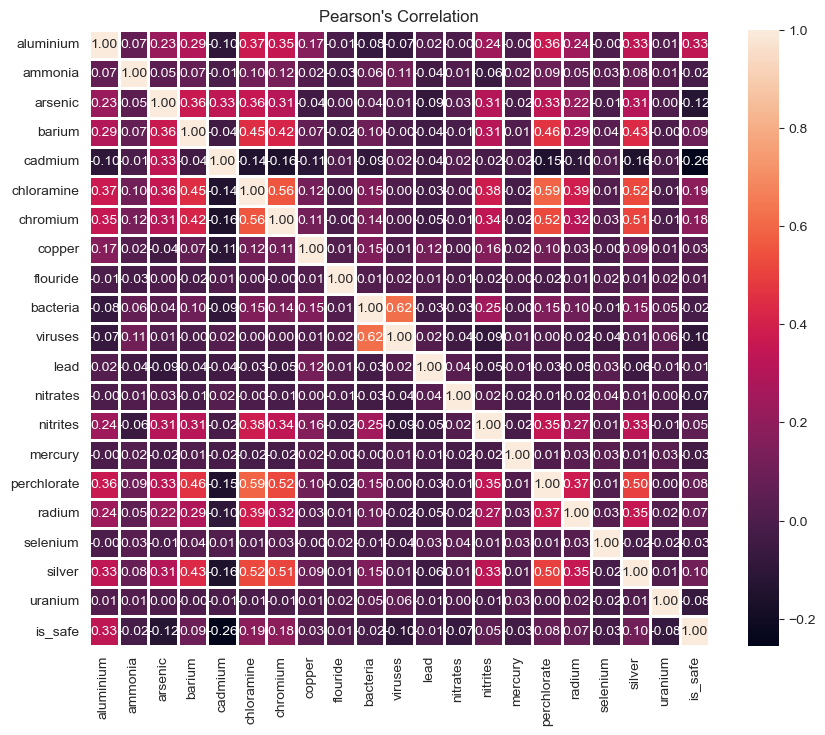

In [12]:
# Correlation: Linear Relationship (Pearson's correlation C= covariance(X, Y) / (stdv(X) * stdv(Y))) 

pearson_corr=df_scaled.corr('pearson')
plt.figure(figsize=(10,8))
sns.heatmap(pearson_corr,annot=True,fmt='.2f', linewidths=1)
plt.title("Pearson's Correlation")
plt.show()


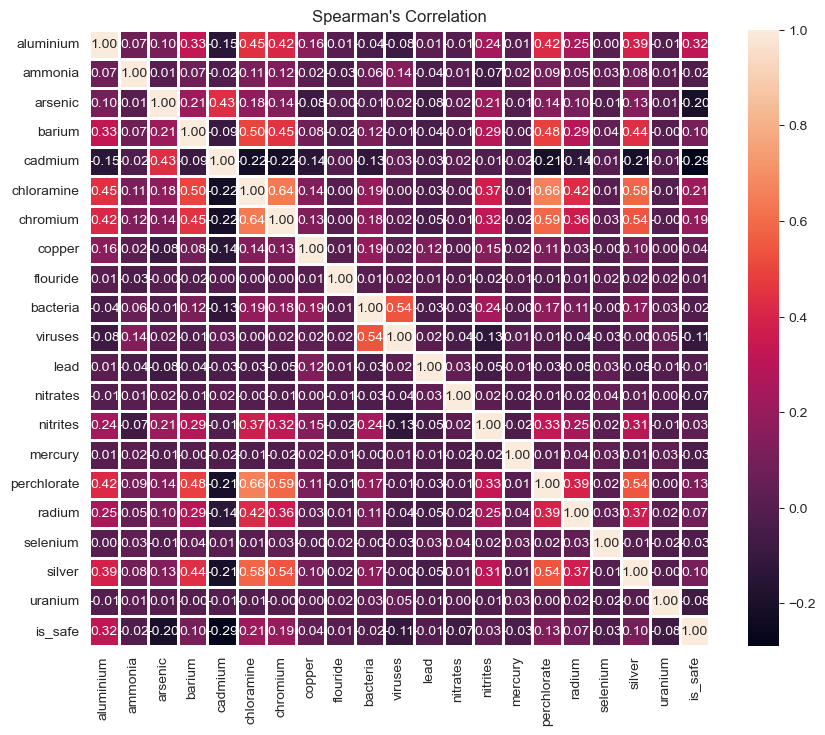

In [13]:
# Correlation Spearman’s Correlation (For non linear relationships)
Spearman_corr= df_scaled.corr('spearman')
plt.figure(figsize=(10,8))
sns.heatmap(Spearman_corr,annot=True,fmt='.2f', linewidths=1)
plt.title("Spearman's Correlation")
plt.show()

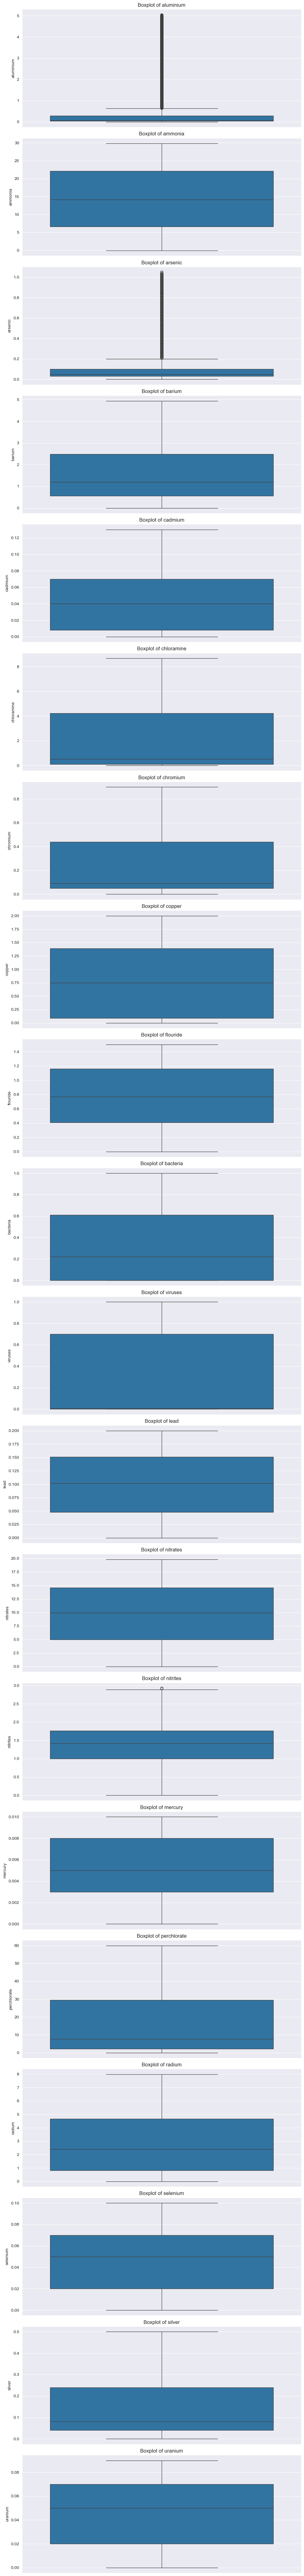

In [14]:
# checking for outliers
fig,axes=plt.subplots(ncols=1,nrows=df.shape[1]-1,figsize=(10,df.shape[1] * 4))
for i,column in enumerate(df.columns[:-1]):
    sns.boxplot(df[column],ax=axes[i])
    axes[i].set_title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()

In [15]:
# Clearning outliers using boxplot
outliers_indexes=df_scaled.loc[(df_scaled['arsenic']>3) | (df_scaled['aluminium']>3) | (df_scaled['arsenic']>3) ].index
clean_data=df_scaled.drop(axis=0,index=outliers_indexes)
clean_data.reset_index(inplace=True,drop=True)

In [17]:
z_score=stats.zscore(clean_data,axis=1)
z_score

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,0.582474,-0.697361,-0.599120,0.842407,-1.080260,-0.816104,1.874231,-1.061300,-1.703987,-0.488753,...,-0.881020,0.913364,-0.474933,0.424501,0.982474,1.413013,0.841928,1.109598,-1.008704,0.791506
1,1.013426,0.381213,-1.253031,1.162617,-1.885827,0.896460,1.360329,-0.805668,-0.189771,0.651467,...,-0.528582,-2.215408,0.704366,-1.418713,0.521319,-0.391845,0.712372,0.471577,-0.304814,0.648543
2,0.134967,-0.169615,-0.627308,-0.963103,-1.118263,0.673760,0.918028,-1.358425,0.367906,-0.969459,...,-0.513415,0.653378,-0.528680,0.135535,1.796584,1.669886,0.575201,1.921745,-1.445714,-0.140152
3,0.382628,-0.449246,-0.589874,0.946296,-1.231373,1.724549,-0.894189,1.099522,0.533849,0.984015,...,-1.490968,-1.569484,-0.201124,-0.515297,-0.527880,-0.623725,-1.110419,1.853819,0.051703,0.809594
4,0.586109,1.857259,-0.397410,-1.221909,-1.080270,0.574350,2.544246,-0.179875,-0.193859,-0.472915,...,0.724747,-0.445430,-0.210581,-0.695570,0.346183,0.013022,-1.094892,-0.521849,-0.938462,1.676946
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7609,-0.411125,-0.698111,-0.589413,0.528540,0.068950,-0.788889,-0.781340,-1.232060,1.771643,-0.977728,...,2.127161,1.106162,-0.514593,0.084026,-0.694754,-0.238748,1.803286,-0.557112,-0.479345,1.332762
7610,-0.220294,1.495793,-0.298114,-0.558761,-0.671852,-0.418724,-0.596910,-0.984269,2.037378,-0.736305,...,-0.956432,0.386831,-0.314523,-1.209100,-0.604784,-0.532285,1.796394,-0.055693,1.702231,1.367882
7611,-0.060373,-0.500715,-0.272578,-0.444108,0.055605,-0.491638,-0.376310,-0.923493,0.833163,-0.655206,...,2.106236,1.738023,-0.198854,-1.556189,-0.521397,1.421083,-1.529254,-0.401721,0.694806,1.621446
7612,0.641825,0.689745,0.536900,1.776285,-0.226010,1.225377,0.129220,-0.106636,-0.985095,0.055716,...,-0.903562,-0.984604,-1.695846,-0.956357,0.106961,-0.316596,-0.926101,-0.021180,-0.839899,2.613074


In [18]:
# cleaning outliers using Z_score
def detect_outliers(data):
    
 z_score=stats.zscore(data.values,axis=1)
 outliers=set()
 for index,example in enumerate(z_score):
     if any(np.abs(feature) > 3 for feature in example):
         outliers.add(index)
 return outliers

outliers_indices=detect_outliers(clean_data)
print(f" number of outliers found using Z-score method: {len(outliers_indices)}")

 number of outliers found using Z-score method: 69


In [19]:
clean_data.drop(axis=0,index=outliers_indices,inplace=True)


In [22]:
print(f"Number of outliers found using boxplot filtering method: {len(outliers_indexes)}")
print(f"percentage of outliers with respect to the whole dataset: {len(outliers_indexes)*100/len(df):.2f}%")
print(f"Number of outliers found using Z-score filtering method: {len(outliers_indices)}")
print(f"Percentage of outliers with respect to the whole dataset {len(outliers_indices)*100/len(df):.2f}%")
print(f"Total percentage of outliers data points {(len(outliers_indices)+len(outliers_indexes))*100/len(df):.2f}%")



Number of outliers found using boxplot filtering method: 382
percentage of outliers with respect to the whole dataset: 4.78%
Number of outliers found using Z-score filtering method: 69
Percentage of outliers with respect to the whole dataset 0.86%
Total percentage of outliers data points 5.64%


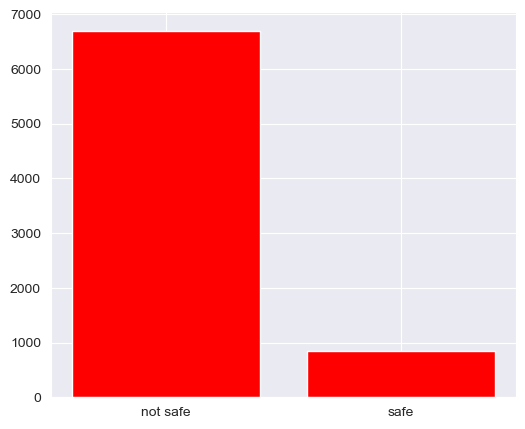

In [80]:
# visualizing the class distribution
plt.figure(figsize=(6,5))
class_distribution=clean_data['is_safe'].value_counts()

class_labels=class_distribution.index.to_numpy()
class_labels=np.where(class_labels==0,"not safe","safe")
count=class_distribution.tolist()
plt.bar(class_labels,class_distribution,align='center',color='red')
plt.show()

In [59]:
# save new data 
import pickle
with(open(r"./cleaned_scaled_data.csv","wb") as f):
    pickle.dump(clean_data,f)

In [ ]:
## Modeling 


In [60]:
# Creating testing and training sets:
X=clean_data.iloc[:,:-1].to_numpy()
y=clean_data['is_safe'].to_numpy()

In [62]:
x_train,x_test,y_train,y_test=train_test_split(X,y,stratify=y,train_size=.8)
print(f"Shape of x_train : {x_train.shape} ")
print(f"Shape of y_train: {y_train.shape} ")
print(f"Shape of x_test : {x_test.shape} ")
print(f"Shape of y_test: {y_test.shape} ")

Shape of x_train : (6033, 20) 
Shape of y_train: (6033,) 
Shape of x_test : (1509, 20) 
Shape of y_test: (1509,) 


In [81]:
# L1 regularization with SGD
from sklearn.linear_model import SGDClassifier
sgd=SGDClassifier(loss='log_loss',penalty='l1',fit_intercept=True,early_stopping=True,n_iter_no_change=20)
sgd.fit(x_train,y_train)



SGDClassifier(early_stopping=True, loss='log_loss', n_iter_no_change=20,
              penalty='l1')

In [115]:
train_predictions=sgd.predict(x_train)
test_predictions=sgd.predict(x_test)
print(f"training accuracy: {accuracy_score(train_predictions,y_train)}")
print(f"test accuracy {accuracy_score(test_predictions,y_test)}")
print("Classification report for testing data ")
print(classification_report(y_test,test_predictions))



training accuracy: 0.9060169070114371
test accuracy 0.9085487077534792
Classification report for testing data 
              precision    recall  f1-score   support

         0.0       0.92      0.98      0.95      1341
         1.0       0.67      0.36      0.47       168

    accuracy                           0.91      1509
   macro avg       0.80      0.67      0.71      1509
weighted avg       0.90      0.91      0.90      1509


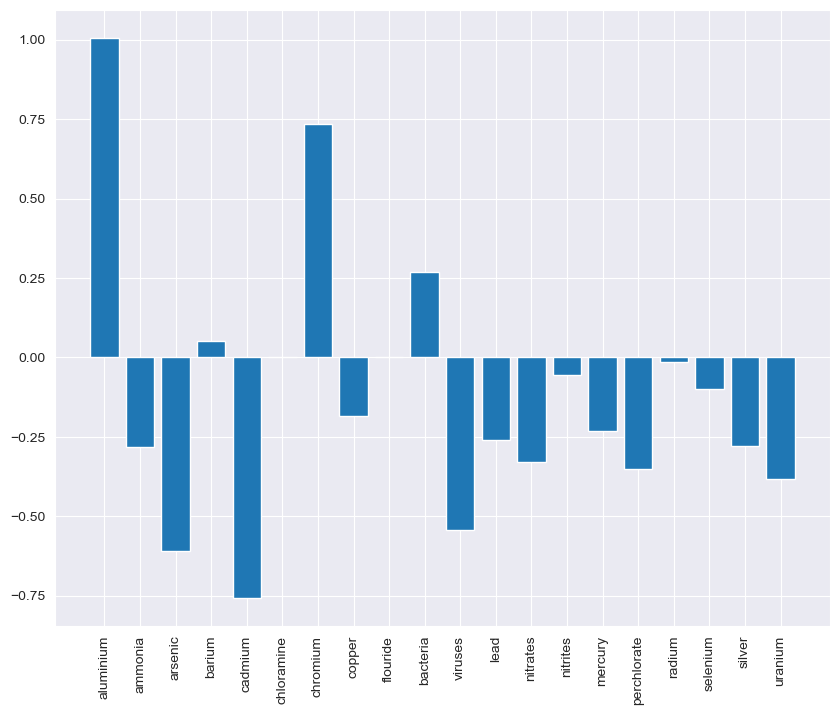

In [150]:
def visualize_coef(model):
 coefs = model.coef_.flatten()
 cols=clean_data.columns[:-1].to_numpy()
 plt.figure(figsize=(10,8))
 plt.bar(cols,coefs)
 plt.xticks(rotation=90)
 plt.show()

visualize_coef(sgd) 

In [143]:
## finding the best regularization param alpha using a greedy search 
models=[]
models_scores=[]
alphas=np.logspace(-6,6,20)
for alpha in alphas:
    model=SGDClassifier(loss='log_loss',penalty='l1',n_jobs=-1,alpha=alpha)
    model.fit(x_train,y_train)
    predictions=model.predict(x_test)
    models_scores.append(accuracy_score(y_test,predictions))
    models.append(model)


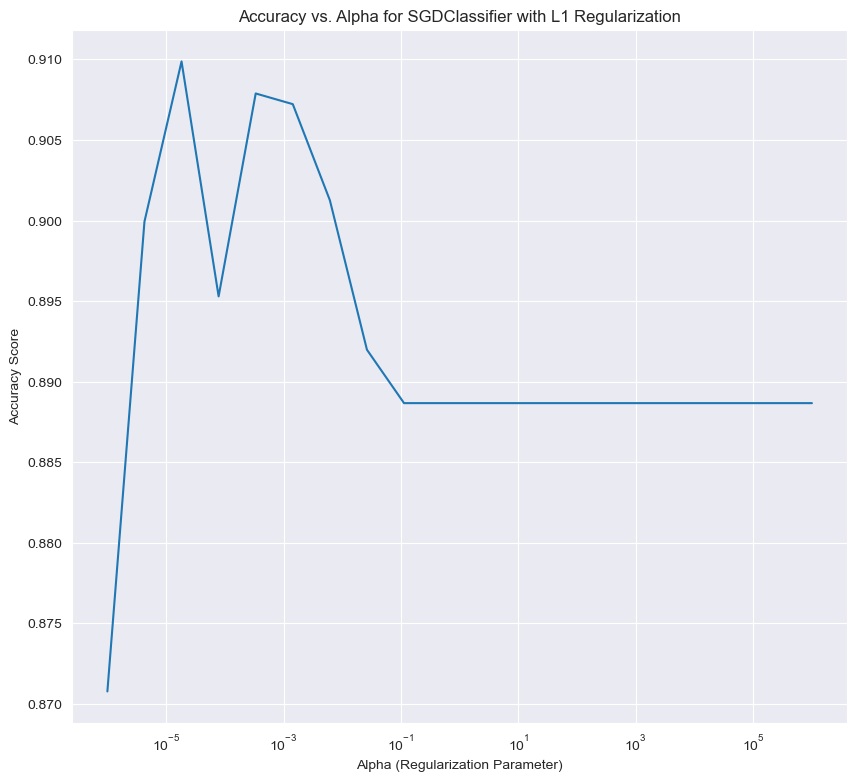

In [146]:
#plotting the results
plt.figure(figsize=(10,9))
plt.plot(alphas,models_scores)
plt.xscale('log')  # Use a logarithmic scale for better visualization
plt.xlabel('Alpha (Regularization Parameter)')
plt.ylabel('Accuracy Score')
plt.title('Accuracy vs. Alpha for SGDClassifier with L1 Regularization')
plt.grid(True)
plt.show()

In [148]:
best_score_idx=np.argmax(models_scores)
best_model=models[best_score_idx]
best_score=models_scores[best_score_idx]
best_alpha=alphas[best_score_idx]
print(f"best model score: {best_score} for the value of alpha {best_alpha}")



best model score: 0.9098740888005301 for the value of alpha 1.8329807108324375e-05


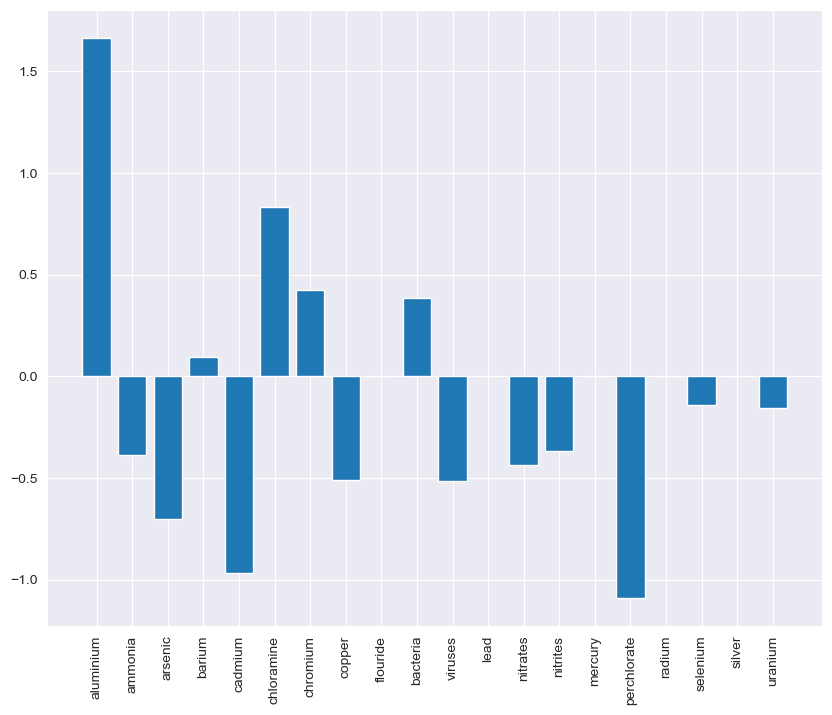

In [151]:
visualize_coef(best_model)

In [170]:
## retraining the model with the non nul features
non_null_feature_idx=np.where(best_model.coef_[0]!=0)[0].tolist()
x_train_after_fs=x_train[:,non_null_feature_idx]
x_test_after_fs=x_test[:,non_null_feature_idx]




In [178]:
sgd_after_fs=SGDClassifier(loss='log_loss',fit_intercept=True)
sgd_after_fs.fit(x_train_after_fs,y_train)
predictions=sgd_after_fs.predict(x_test_after_fs)
acc_after_fs=accuracy_score(predictions,y_test)
acc_after_fs

0.9118621603711067

In [181]:
print(classification_report(y_test,predictions))
print(f1_score(predictions,y_test))

              precision    recall  f1-score   support

         0.0       0.92      0.98      0.95      1341
         1.0       0.72      0.35      0.47       168

    accuracy                           0.91      1509
   macro avg       0.82      0.66      0.71      1509
weighted avg       0.90      0.91      0.90      1509

0.465863453815261


In [196]:
## comparing with the xgboost classifier
from sklearn.model_selection import RandomizedSearchCV

depth=np.linspace(3,18,2).astype(np.int8)
learning_rate=[0.05,0.10,0.15,0.20,0.25,0.30,0.35]
device=['cuda']
gamma=[0,.1,.2,.3,.4]
alpha=np.linspace(0,1e-3,10).tolist()
objectif=['binary:logistic']
eta=[0.3,0,4,.5,.6]

param = {'max_depth': depth, 'eta': eta, 'objective': objectif,'gamma':gamma ,'device':device,'learning_rate':learning_rate}
xgb=XGBClassifier()
random_search=RandomizedSearchCV(estimator=xgb,
                                 param_distributions=param,
                                 n_jobs=-1,
                                 cv=5,
                                 scoring='accuracy',
                                 verbose=2
                                )

In [197]:
random_search.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[23:32:24] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "device" } are not used.


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           predictor=None, random_state=None, ...),
                   n_jobs=-1,
                   param_distributions={'device': ['cuda'],
                                        'eta': [0.3, 0, 4, 0.5, 0.6],
                                        'gamma': [0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25, 0.3, 0.35],
                                        'max_depth': array([ 3, 18], dtype=int8),
                                        'objective': ['binary:logistic']},
                   scoring='accuracy', verbose=2)

In [200]:

best_params=random_search.best_params_
best_estimator=random_search.best_estimator_
pred=best_estimator.predict(x_test)



In [202]:
test_score=accuracy_score(pred,y_test)
test_score

0.9688535453943009

In [203]:
f1_score(pred,y_test)

0.8544891640866873

In [ ]:
## Comparing with a CNN
